<a href="https://colab.research.google.com/github/rajandasguptaml/APWT_A_MID_LAB_TASK/blob/main/thesis%20sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Born", "Death"]

In [11]:
data = pd.read_csv('neodeath.csv',sep=',')
data.head()

tp_birth_place  maternal_age  ...  cd_robson_group  neonataldeath
0               1            32  ...              5.0              0
1               1            40  ...              7.0              0
2               1            31  ...              5.0              0
3               1            19  ...              4.0              0
4               1            33  ...              3.0              0

[5 rows x 24 columns]

In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829257 entries, 0 to 829256
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   tp_birth_place               829257 non-null  int64  
 1   maternal_age                 829257 non-null  int64  
 2   tp_marital_status            829257 non-null  int64  
 3   tp_maternal_education_years  829257 non-null  int64  
 4   num_live_births              829257 non-null  int64  
 5   num_fetal_losses             829257 non-null  int64  
 6   tp_pregnancy_duration        829257 non-null  int64  
 7   tp_pregnancy                 829257 non-null  int64  
 8   tp_labor                     829257 non-null  int64  
 9   tp_prenatal_appointments     829257 non-null  int64  
 10  cd_apgar1                    829257 non-null  int64  
 11  cd_apgar5                    829257 non-null  int64  
 12  newborn_weight               829257 non-null  int64  
 13 

In [13]:
data.isnull().values.any()


True

In [14]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["neonataldeath"]]
# Store the variable we are predicting 
target = "neonataldeath"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(829257, 23)
(829257,)


Text(0, 0.5, 'Total Baby')

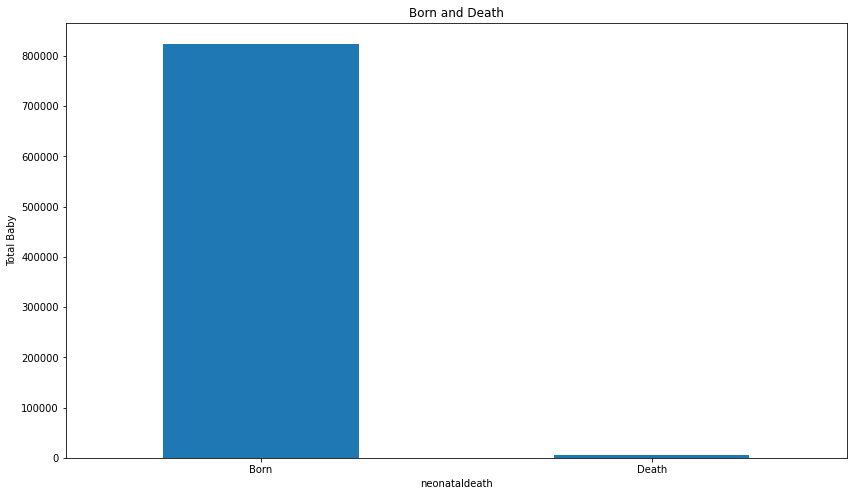

In [15]:
count_classes = pd.value_counts(data['neonataldeath'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Born and Death")

plt.xticks(range(2), LABELS)

plt.xlabel("neonataldeath")

plt.ylabel("Total Baby")

In [16]:
born = data[data['neonataldeath']==1]

death = data[data['neonataldeath']==0]

In [17]:
print(born.shape,death.shape)


(5152, 24) (824105, 24)


In [18]:
from imblearn.under_sampling import NearMiss


In [25]:
from imblearn import under_sampling as nm

nm.NearMiss(
    sampling_strategy='auto',
    version=1,
    n_neighbors=3,
    n_neighbors_ver3=3,
    n_jobs=None,
)

NearMiss()

In [29]:
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
X_res, Y_res = under_sampler.fit_resample(X, Y)

In [31]:
X_res.shape,Y_res.shape


((10304, 23), (10304,))

In [33]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(Y_res)))

Original dataset shape Counter({0: 824105, 1: 5152})
Resampled dataset shape Counter({0: 5152, 1: 5152})


In [41]:
X_res.to_csv("C:/Users/leo/OneDrive/Desktop/borndeath.csv")


FileNotFoundError: ignored

# New Section